In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn import metrics
from sklearn.metrics import accuracy_score
import re
import random
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
print('start reading...')
prefix = "/Users/isabelniu/Documents/HKUST-20Spring/ML/Project/CompleteDataSet/"
train = pd.read_csv(prefix + "FinalEncodedTrain.csv")
print('done reading')

start reading...
done reading


In [9]:
train.shape

(7377418, 36)

In [10]:
train=train.drop(train.columns[0],1)

In [11]:
print('data split start...')
# Features and target varaibles
X = train.drop(columns='target',axis=1)
Y = train['target']

data split start...


In [12]:
# Train and test split
X_train_all, X_test, y_train_all, y_test = train_test_split(X, Y, test_size=0.2)

# Further split train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_all, y_train_all, test_size=0.2)
print('data split done.')

data split done.


In [13]:
del X
del Y
del X_train_all
del y_train_all
import gc
gc.collect()

231

In [14]:
# Small sample of data
idx = random.sample(range(0, X_train.shape[0]), 100000)
X_train_sampled = X_train.iloc[idx]
y_train_sampled = y_train.iloc[idx]

In [15]:
# Pipeline and grid search

# Estimator: ML algorithm
pipe_dt = Pipeline([('clf', KNeighborsClassifier(n_jobs=-1))])

grid_params = dict(clf__n_neighbors=[3, 5, 11, 15, 21, 25, 27],
                   clf__weights=['uniform', 'distance'])

gs = GridSearchCV(estimator=pipe_dt,
                  param_grid=grid_params,
                  scoring='accuracy',
                  cv=5)

gs.fit(X_train_sampled, y_train_sampled)
f"{gs.score(X_test, y_test):.4f}"

'0.5444'

In [16]:
# find specific model parameters
print(gs.best_estimator_)

# Best model with specific model parameters
gs.best_estimator_.get_params()['clf']

Pipeline(memory=None,
         steps=[('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=21, p=2,
                                      weights='uniform'))],
         verbose=False)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
# Fit with best hyperparameters

In [18]:
m = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         n_neighbors=21, weights='uniform',p=2, n_jobs=-1)
m.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

In [19]:
# Validation accuracy
predicted = m.predict(X_val)
accuracy = accuracy_score(y_val, predicted)
print(f'Mean accuracy score validation: {accuracy:.3}')

Mean accuracy score validation: 0.567


In [31]:
# Test accuracy
predicted = m.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score test: {accuracy:.3}')

Mean accuracy score test: 0.566


In [32]:
# Analysis

In [33]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predicted)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.57 0.57]
recall: [0.55 0.59]
fscore: [0.56 0.58]
support: [732751 742733]


Confusion matrix, without normalization
[[400612 332139]
 [307826 434907]]
Normalized confusion matrix
[[0.55 0.45]
 [0.41 0.59]]


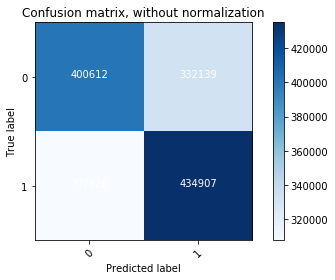

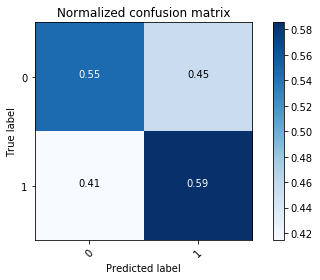

In [35]:
# Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix
class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = 0.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [24]:
# Predict probability for ROC curve
predicted = m.predict_proba(X_test)

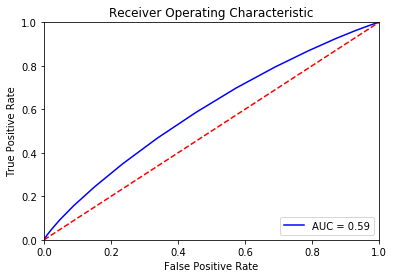

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, [i[1] for i in predicted])
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,
         'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()